<h3 style="text-align:center">Logistic Regression with TensorFlow</h3>

<h3><u>Introduction</u></h3>

The goal of this notebook is to familiarize with the <u>TensorFlow</u>, the Deep Learning library build by Google in November 2015. <br>
Now it is the framework that it is the most used and we will use it in order to build a Logistic Regression model using the Iris dataset.

<h3><u>Package</u></h3>

First let's import the packages that we need to achieve our goal:

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<h3>Load Iris dataset</h3>

In [2]:
# Load dataset
data = pd.read_csv('Iris.csv')
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

To simplify things, we will only consider 2 attributes and 2 classes.

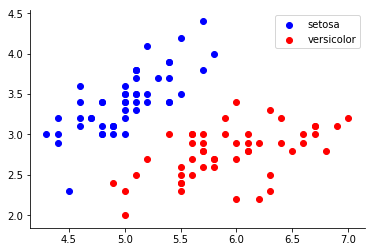

In [3]:
X = data.iloc[:100, 1:3].values
y = data.iloc[:100, 5].values

m = 100

setosa = plt.scatter(X[:50, 0], X[:50, 1], c='b', label="setosa")
versicolor = plt.scatter(X[50:, 0], X[50:, 1], c='r', label="versicolor")
plt.legend()
sns.despine()
plt.show()

We must not forget to add an extra bias feature ($x_0 = 1$) to every instance. <br>
For this, we just need to add a column full of 1s on the left of the input matrix <b>X</b>:

In [4]:
X_with_bias = np.c_[np.ones((m, 1)), X]

Let's check:

Now let's reshape y_train to make it a column vector (i.e. a 2D array with a single column):

In [5]:
y.shape

(100,)

In [6]:
y_column_vector = y.reshape(-1, 1)
y_column_vector.shape

(100, 1)

Finally, we convert the Species into number, in this case, we will impose <br>
'Iris-setosa' = 1 and 'Iris-versicolor' = 0

In [7]:
y_bin = (np.where(y_column_vector == 'Iris-setosa', 1, 0))

In [8]:
full_data = np.concatenate((X_with_bias, y_bin), axis=1)

In [9]:
full_data.shape

(100, 4)

In [10]:
full_data

array([[ 1. ,  5.1,  3.5,  1. ],
       [ 1. ,  4.9,  3. ,  1. ],
       [ 1. ,  4.7,  3.2,  1. ],
       [ 1. ,  4.6,  3.1,  1. ],
       [ 1. ,  5. ,  3.6,  1. ],
       [ 1. ,  5.4,  3.9,  1. ],
       [ 1. ,  4.6,  3.4,  1. ],
       [ 1. ,  5. ,  3.4,  1. ],
       [ 1. ,  4.4,  2.9,  1. ],
       [ 1. ,  4.9,  3.1,  1. ],
       [ 1. ,  5.4,  3.7,  1. ],
       [ 1. ,  4.8,  3.4,  1. ],
       [ 1. ,  4.8,  3. ,  1. ],
       [ 1. ,  4.3,  3. ,  1. ],
       [ 1. ,  5.8,  4. ,  1. ],
       [ 1. ,  5.7,  4.4,  1. ],
       [ 1. ,  5.4,  3.9,  1. ],
       [ 1. ,  5.1,  3.5,  1. ],
       [ 1. ,  5.7,  3.8,  1. ],
       [ 1. ,  5.1,  3.8,  1. ],
       [ 1. ,  5.4,  3.4,  1. ],
       [ 1. ,  5.1,  3.7,  1. ],
       [ 1. ,  4.6,  3.6,  1. ],
       [ 1. ,  5.1,  3.3,  1. ],
       [ 1. ,  4.8,  3.4,  1. ],
       [ 1. ,  5. ,  3. ,  1. ],
       [ 1. ,  5. ,  3.4,  1. ],
       [ 1. ,  5.2,  3.5,  1. ],
       [ 1. ,  5.2,  3.4,  1. ],
       [ 1. ,  4.7,  3.2,  1. ],
       [ 1

<h3><u>Train/Test set split</u></h3>

We will split the loaded dataset into two, <b>80%</b> of which we will use to train our model and <b>20%</b> that we will hold back as a test dataset.

In [11]:
np.random.seed(42) # To make output consistent in this notebook

In [12]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data[train_indices], data[test_indices]

In [13]:
test_ratio = 0.2
train, test = split_train_test(full_data, test_ratio=test_ratio)
print("Train size:", train.shape, "Test size:", test.shape)

Train size: (80, 4) Test size: (20, 4)


In [14]:
X_train, y_train = train[:, 0:5], train[:, -1].reshape(-1, 1)
X_test, y_test = test[:, 0:5], test[:, -1].reshape(-1, 1)
print("X_train.shape:", X_train.shape, "y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape:", y_test.shape)

X_train.shape: (80, 4) y_train.shape: (80, 1)
X_test.shape: (20, 4) y_test.shape: (20, 1)


<h3><u>TensorFlow</u></h3>

Let's the reset the default graph:

In [15]:
tf.reset_default_graph()

Our preprocessed data has two input features, the sepal length and the sepal width

In [16]:
n_inputs = 2

The Logistic Regression computes a weighted sum of the inputs and then it applies the sigmoid function to the result, which gives us the estimated probability for the positive class:
$\hat p = h_{\boldsymbol{\theta}}(x) = \sigma(\boldsymbol{\theta}^{T}.\boldsymbol{x})$


Recall that $\boldsymbol{\theta}$ is the parameter vector, containing the bias term $\theta_0$ and the weights $\theta_1, \theta_2, ..., \theta_n$. <br>
The input vector $\boldsymbol{x}$ contains a constant term $x_0 = 1$, as well as all the input features $x_1, x_2, ..., x_n$.

Now let's define the <b>logistic_regression()</b> function to create the graph. We will leave out the definition of the inputs X and the targets y. We could include them here, but leaving them out will make it easier to use this function in a wide range of use cases (e.g. perhaps we will want to add some preprocessing steps for the inputs before we feed them to the Logistic Regression model).

In [22]:
def logistic_regression(X, y, initializer=None, seed=42, learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    
    with tf.name_scope("logistic_regression"):
        
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed=seed)
                
            theta = tf.Variable(initializer, name="theta")
            logits = tf.matmul(X, theta, name="logits")
            y_proba = tf.sigmoid(logits)
            
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y, y_proba, scope="loss")
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('loss_loss', loss)
            
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
            
        with tf.name_scope("save"):
            saver = tf.train.Saver()
        
    return y_proba, loss, training_op, loss_summary, init, saver

Let's create a little function to get the name of the log directory to save the summaries for Tensorboard:

In [23]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

Now, let's create the graph using the <b>logistic_regression()</b> function. We will also create the <b>FileWriter</b> to save the summaries to the log directory for Tensorboard.

In [24]:
n_inputs = 2 
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32, shape=(None, n_inputs + 1))
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())